In [1]:
import pandas as pd
import pymysql
import pprint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import base64
from io import BytesIO

In [2]:
path = ...
train_image_path = path + './train_imgs/'

In [3]:
train = pd.read_csv(path + './train_df.csv')

In [5]:
conn = pymysql.connect(host=..., user=..., charset='utf8') 
cursor = conn.cursor(pymysql.cursors.DictCursor)

In [37]:
# sql = "CREATE DATABASE dacon;" 
# cursor.execute(sql) 

In [10]:
sql = "USE dacon;" 
cursor.execute(sql) 

0

In [27]:
# sql = '''
# CREATE TABLE keypoint(
# id INT(11) NOT NULL AUTO_INCREMENT,
# nose_x FLOAT(11) NOT NULL,
# nose_y FLOAT(11) NOT NULL,
# left_eye_x FLOAT(11) NOT NULL,
# left_eye_y FLOAT(11) NOT NULL,
# right_eye_x FLOAT(11) NOT NULL,
# right_eye_y FLOAT(11) NOT NULL,
# left_ear_x FLOAT(11) NOT NULL,
# left_ear_y FLOAT(11) NOT NULL,
# right_ear_x FLOAT(11) NOT NULL,
# right_ear_y FLOAT(11) NOT NULL,
# left_shoulder_x FLOAT(11) NOT NULL,
# left_shoulder_y FLOAT(11) NOT NULL,
# right_shoulder_x FLOAT(11) NOT NULL,
# right_shoulder_y FLOAT(11) NOT NULL,
# left_elbow_x FLOAT(11) NOT NULL,
# left_elbow_y FLOAT(11) NOT NULL,
# right_elbow_x FLOAT(11) NOT NULL,
# right_elbow_y FLOAT(11) NOT NULL,
# left_wrist_x FLOAT(11) NOT NULL,
# left_wrist_y FLOAT(11) NOT NULL,
# right_wrist_x FLOAT(11) NOT NULL,
# right_wrist_y FLOAT(11) NOT NULL,
# left_hip_x FLOAT(11) NOT NULL,
# left_hip_y FLOAT(11) NOT NULL,
# right_hip_x FLOAT(11) NOT NULL,
# right_hip_y FLOAT(11) NOT NULL,
# left_knee_x FLOAT(11) NOT NULL,
# left_knee_y FLOAT(11) NOT NULL,
# right_knee_x FLOAT(11) NOT NULL,
# right_knee_y FLOAT(11) NOT NULL,
# left_ankle_x FLOAT(11) NOT NULL,
# left_ankle_y FLOAT(11) NOT NULL,
# right_ankle_x FLOAT(11) NOT NULL,
# right_ankle_y FLOAT(11) NOT NULL,
# neck_x FLOAT(11) NOT NULL,
# neck_y FLOAT(11) NOT NULL,
# left_palm_x FLOAT(11) NOT NULL,
# left_palm_y FLOAT(11) NOT NULL,
# right_palm_x FLOAT(11) NOT NULL,
# right_palm_y FLOAT(11) NOT NULL,
# spine2_back_x FLOAT(11) NOT NULL,
# spine2_back_y FLOAT(11) NOT NULL,
# spine1_waist_x FLOAT(11) NOT NULL,
# spine1_waist_y FLOAT(11) NOT NULL,
# left_instep_x FLOAT(11) NOT NULL,
# left_instep_y FLOAT(11) NOT NULL,
# right_instep_x FLOAT(11) NOT NULL,
# right_instep_y FLOAT(11) NOT NULL,
# PRIMARY KEY (id)
# )
# '''
# cursor.execute(sql) 

0

In [28]:
# sql = '''
# CREATE TABLE images (
# id INT(11) NOT NULL AUTO_INCREMENT,
# image_id INT(11) NOT NULL,
# file_name VARCHAR(30) NOT NULL,
# image MEDIUMBLOB NOT NULL,
# PRIMARY KEY (id),
# FOREIGN KEY (image_id) REFERENCES keypoint(id)
# )
# '''
# cursor.execute(sql) 

0

In [30]:
# buffer = BytesIO()
# cols = 'nose_x, nose_y, left_eye_x, left_eye_y, right_eye_x, right_eye_y, left_ear_x, left_ear_y, right_ear_x, right_ear_y, left_shoulder_x, left_shoulder_y, right_shoulder_x, right_shoulder_y, left_elbow_x, left_elbow_y, right_elbow_x, right_elbow_y, left_wrist_x, left_wrist_y,right_wrist_x, right_wrist_y, left_hip_x, left_hip_y, right_hip_x, right_hip_y, left_knee_x, left_knee_y, right_knee_x, right_knee_y,left_ankle_x, left_ankle_y, right_ankle_x, right_ankle_y, neck_x, neck_y, left_palm_x, left_palm_y, right_palm_x, right_palm_y, spine2_back_x, spine2_back_y, spine1_waist_x, spine1_waist_y, left_instep_x, left_instep_y, right_instep_x, right_instep_y'
# for i in range(50):
#     sql = f"INSERT INTO keypoint ({cols}) VALUES ({', '.join(list(map(str, train.iloc[i].values[1:])))})"
#     cursor.execute(sql) 
    
#     file_name = train.iloc[i]["image"]
#     im = Image.open(train_image_path + file_name)
#     im.save(buffer, format='jpeg')
#     img_str = base64.b64encode(buffer.getvalue()).decode('UTF-8')
#     sql = f"INSERT INTO images (image_id, file_name, image) VALUES {i+1, file_name, img_str}"
#     cursor.execute(sql) 
# # conn.commit()

In [31]:
# sql = "SELECT * FROM keypoint;" 
# cursor.execute(sql) 
# result = cursor.fetchall()
# keypoint_df = pd.json_normalize(result)

In [32]:
sql = "SELECT * FROM images;" 
cursor.execute(sql) 
result = cursor.fetchall()
image_df = pd.json_normalize(result)

In [34]:
img = base64.decodebytes(image_df.iloc[0]['image'])

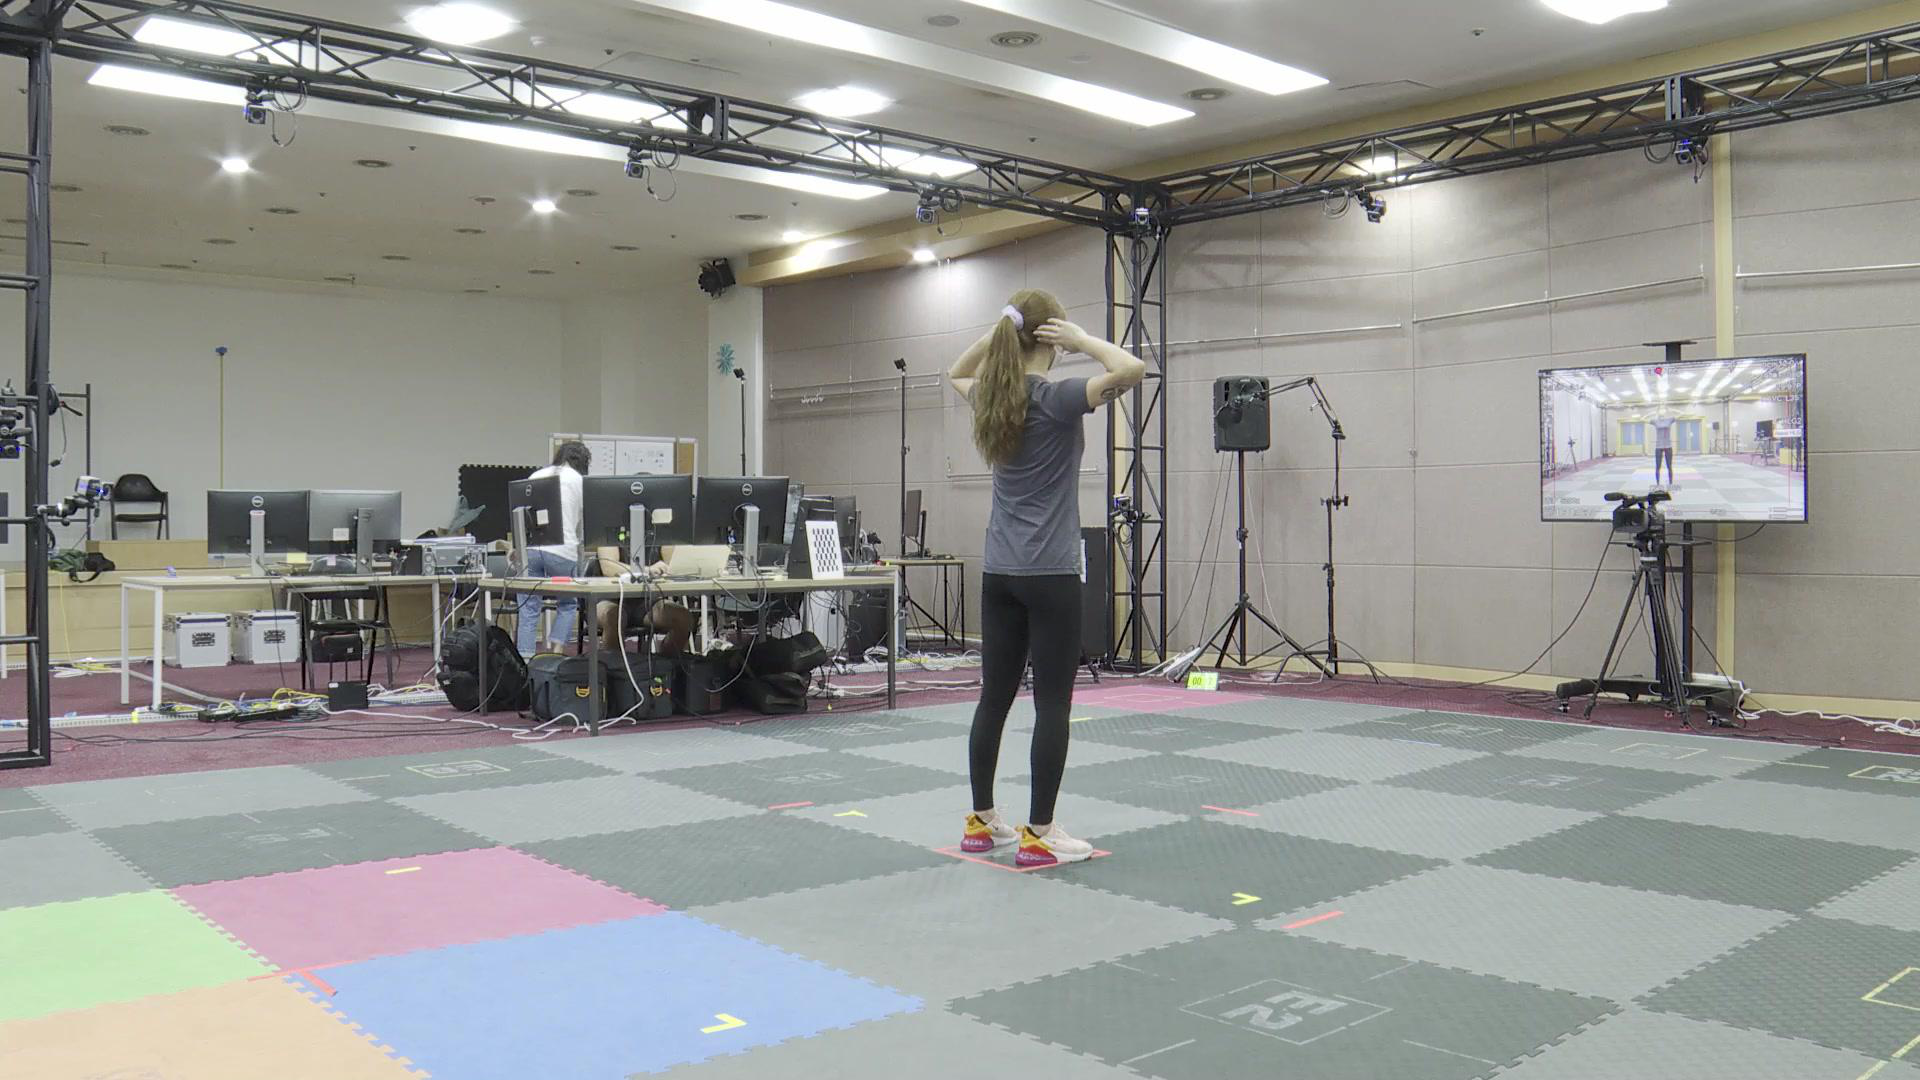

In [35]:
Image.open(BytesIO(img))

In [38]:
sql = "SELECT * FROM images LEFT JOIN keypoint on keypoint.id = images.image_id;" 
cursor.execute(sql) 
result = cursor.fetchall()
df = pd.json_normalize(result)

In [40]:
df.head()

,id,image_id,file_name,image,keypoint.id,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,...,right_palm_x,right_palm_y,spine2_back_x,spine2_back_y,spine1_waist_x,spine1_waist_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y
0,1,1,001-1-1-01-Z17_A-0000001.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,1,1046.39,344.758,1041.66,329.820,1059.43,...,1067.00,335.000,1019.480,455.000,1026.520,514.055,998.579,826.718,1063.20,838.827
1,2,2,001-1-1-01-Z17_A-0000003.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,2,1069.85,340.711,1058.61,324.594,1075.24,...,1081.19,323.000,1046.950,454.063,1058.770,508.797,1002.270,699.063,1066.38,841.499
2,3,3,001-1-1-01-Z17_A-0000005.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,3,1084.48,337.000,1078.72,323.758,1095.65,...,1101.00,334.000,1044.540,442.055,1052.840,495.891,989.438,808.758,1066.07,841.750
3,4,4,001-1-1-01-Z17_A-0000007.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,4,1042.32,361.453,1037.91,344.118,1050.33,...,1057.41,372.461,982.937,458.109,990.375,507.625,1001.310,829.234,1159.52,599.390
4,5,5,001-1-1-01-Z17_A-0000009.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,5,1058.05,343.164,1046.72,331.703,1058.13,...,1069.65,334.109,1024.840,453.688,1034.390,510.844,998.625,805.219,1059.63,839.765
